# Predicting Heart Disease using Machine Learning

This notebook looks into using Various Python-based ML and Data Science Libraries in an attempt to build a machine learning model capable of predicting whether someone has heart disease or not based on their medical attributes

We're going to take following Approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement,
> Given Clinical Parameters about a Patient, can we predict whether someone has a heart disease or not 

## 2. Data

The Original Data came from the Cleveland Data from the UCI Machine Learning Repository.
It is available on Kaggle.
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data

## 3. Evaluation

> If we can reach 95% Accuracy at predicting whether or not a patient, it is a good estimate.

## 4. Features

**Create a Data Dictionary**

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute




## Preparing the Tools
We're going to use Pandas, Matplotlib and Numpy for Data Analysis and Manipulation

In [7]:
# Import all the tools we need
# Regular EDA (Exploratory Data Analysis) and Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
# We want our plot to appear inside the Notebook
%matplotlib inline 

# Models from SKLearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load the Data

In [8]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

## Exploratory Data Analysis (EDA)

1. What questions are you trying to solve?
2. What kind of Data do we have?
3. What's missing from the data?
4. Where are the outliers and why should you care about them?
5. How can you add, change , or remove featres to get more out of your data?

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
# Let's find out how many of each class there are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

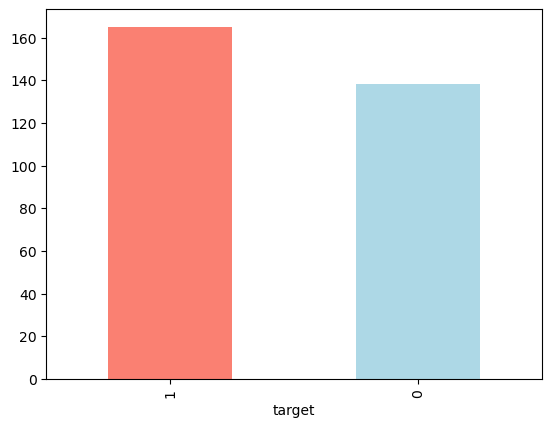

In [11]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])
plt.show()
plt.close('all')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
# Are there any  missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


 ### Heart Disease Frequency according to Sex

In [15]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [16]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


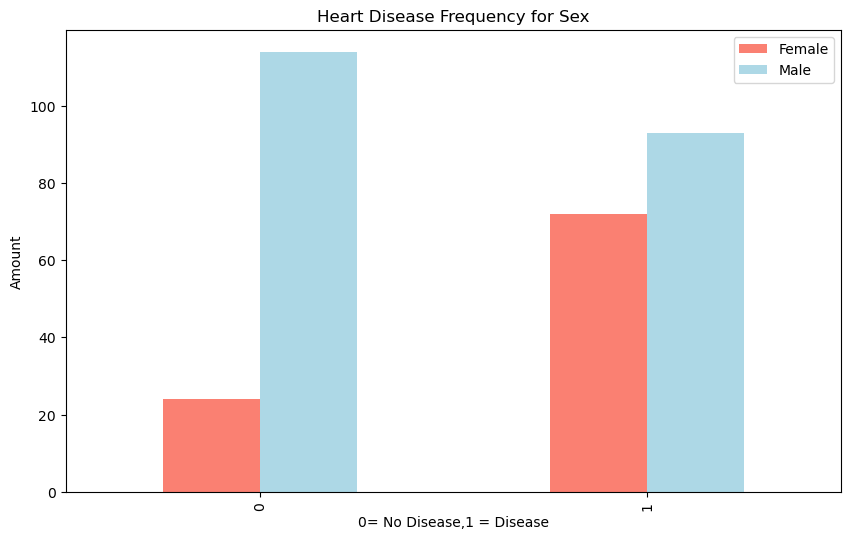

In [21]:
# Create a Plot of Crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0= No Disease,1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.show()

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age vs Max Heart Rate for Heart Disease


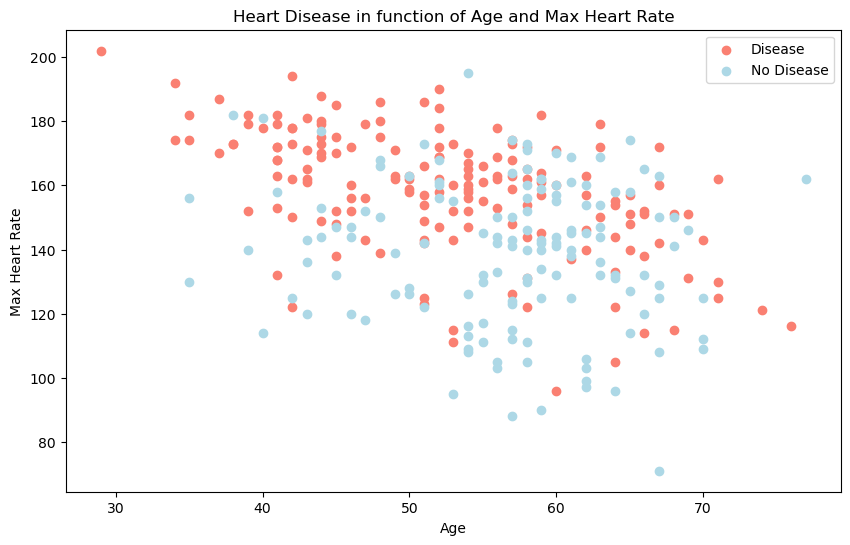

In [29]:
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1], df["thalach"][df.target == 1],c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target == 0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])
plt.show()

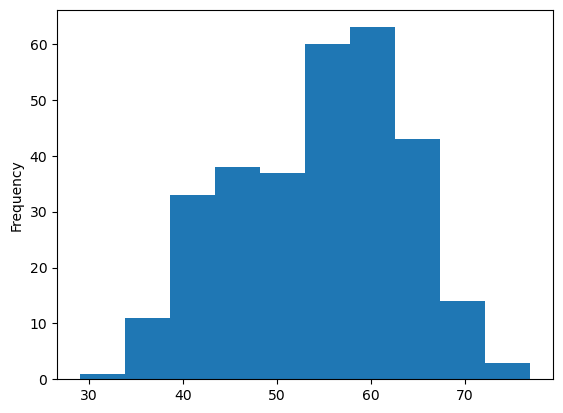

In [32]:
# check the distribution of the age column with Histogram

df["age"].plot.hist();
plt.show()

### Heart Disease Frequency per Chest Pain Type

In [33]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


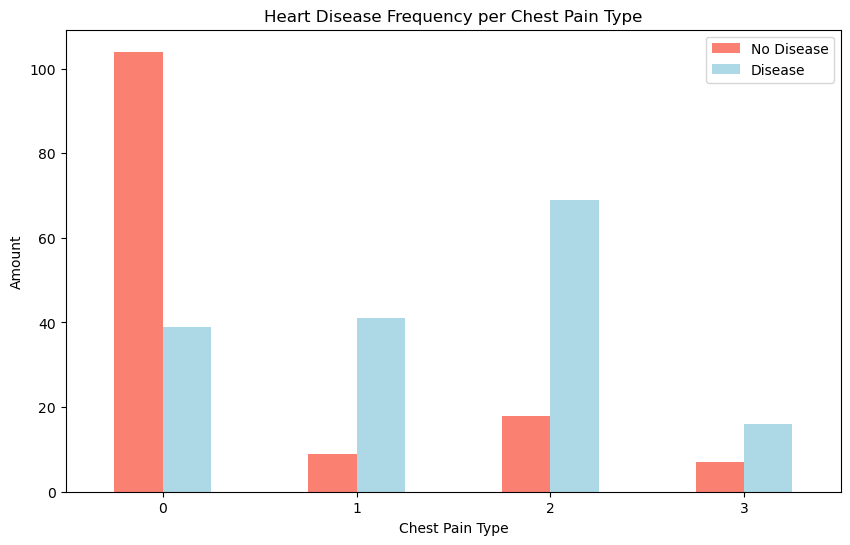

In [35]:
pd.crosstab(df['cp'],df['target']).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)
plt.show()

In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
# Make a Correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


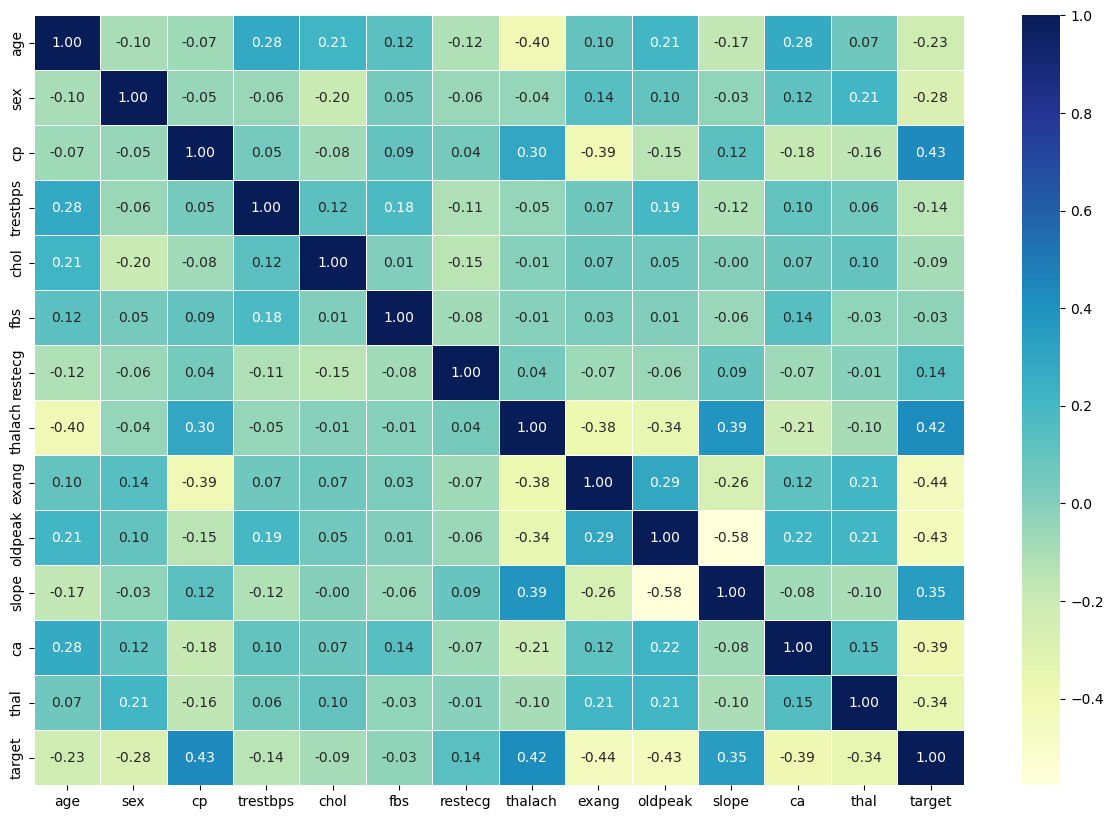

In [39]:
# Let's make our Correlation Matrix matrix a Little Prettier
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
plt.show()
fig.savefig("Correlation Analysis.png")

## 5. Modelling

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
# Split Data into X and y

X = df.drop('target',axis=1)
y = df['target']


In [43]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

We're going to try 3 different Machine Learning models:
1. Logistic Regression
2. K-Nearest Neighbour Classification
3. Random Forest Classifier

In [47]:
# Put models in a Dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    # Loop through Models
    for name,model in models.items():

        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores


In [49]:
model_scores = fit_and_score(models, X_train,X_test,y_train,y_test)
model_scores

/Users/hari/Desktop/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

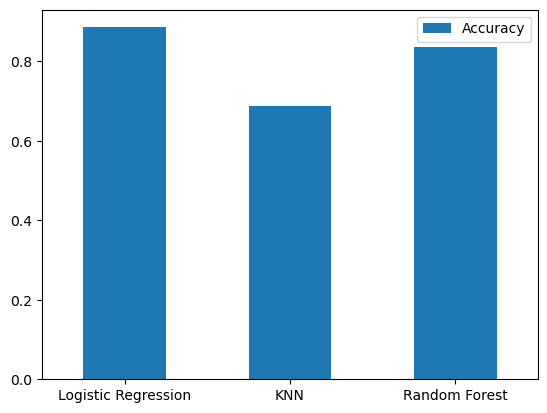

In [55]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0)
plt.show()
plt.close('all')

Now we got a baseline model

Let's look at the following:
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under the Curve (AUC)

### HyperParameter Tuning

In [59]:
train_scores = []
test_scores = []

# Create a List of Different values for n_neighbors
neighbors = range(1,21)
neighbors

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [60]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

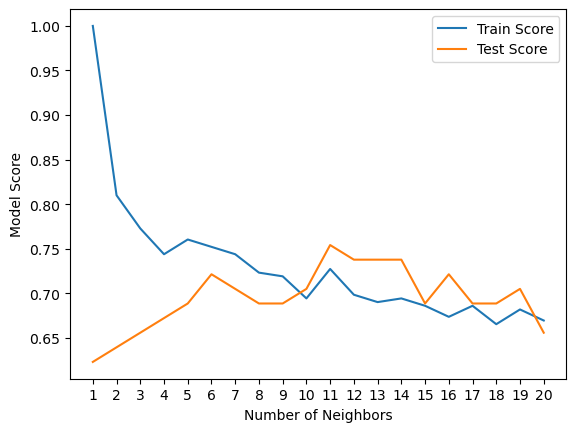

Max KNN Score on the Test Data: 75.41%


In [65]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
plt.show()
print(f"Max KNN Score on the Test Data: {max(test_scores)*100:.2f}%")

## HyperParameter Tuning with RandomizedSearchCV

We're going to tune:
* Logistic Regression()
* RandomForestClassifier()
using RandomizedSearchCV

In [67]:
# Create a Hyperparameter Grid
log_reg_grid = {"C": np.logspace(-4,4,20), 
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)
          }

In [68]:
# Tune LogisticRegression Model
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,n_iter=20,verbose=True)
# Fit Random HyperParameter Search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [69]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Let's Tune the RandomForestClassifier

In [73]:
np.random.seed(42)


rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [74]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [76]:
#Evaluate the RandomForestClassifier using RandomizedSearchCV
rs_rf.score(X_test,y_test)

0.8688524590163934

In [78]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Logistic Regression
## Hyperparamet Tuning with GridSearchCV

In [79]:
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [80]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [81]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluation Metrics, beyond Accuracy
* ROC Curve and AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

...and it would be great if Cross Validation was used where possible.

In [93]:
# Make Predictions with Tuned Model
y_preds = gs_log_reg.predict(X_test)
y_probs = gs_log_reg.predict_proba(X_test)
y_probs_positive = y_probs[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_probs_positive,)


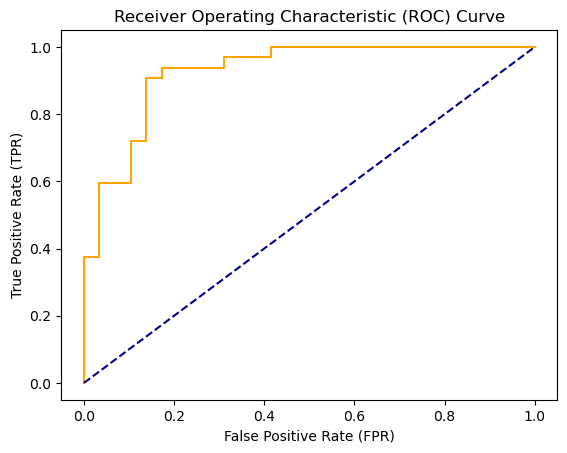

In [96]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC Curve given the FPR and TPR of a Model
    """
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.show()
    plt.close('all')

plot_roc_curve(fpr,tpr)

In [97]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


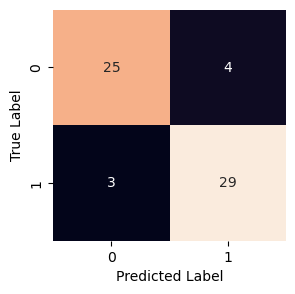

In [101]:


def plot_conf_mat(y_test,y_preds):
    """
    Plots a Nice looking Confusion Matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_conf_mat(y_test,y_preds)

Let's get a Classification Report as well as Cross Validated Precision, Recall and F1 Score

In [102]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation Metrics using Cross - Validation

In [103]:
# Check Best Hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [106]:
# Create a New Classifier with Best Parameters
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(C=0.20433597178569418,solver="liblinear")

In [119]:
# Cross Validated Accuracy
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [109]:
cv_precision = cross_val_score(clf, X,y,cv=5,scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [110]:
cv_recall = cross_val_score(clf, X,y,cv=5,scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [112]:
cv_f1_score = cross_val_score(clf, X,y,cv=5,scoring="f1")
cv_f1_score = np.mean(cv_f1_score)
cv_f1_score

0.8673007976269721

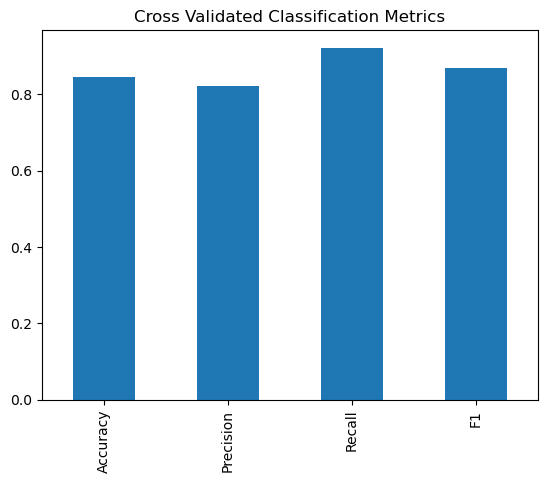

In [121]:
# Visualise our Cross Validated Metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1_score},index=[0])
cv_metrics.T.plot.bar(title="Cross Validated Classification Metrics",
                      legend=False)
plt.show()

### FEATURE IMPORTANCE

Which Features contributed most to the outcomes of the model and how did they contribute?

Finding Feature Importance is different for different model

Let's find the Feature Importance for our LogisticRegression Model..

In [122]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [123]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [124]:
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [126]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [127]:
# Match Coef's of Features to Columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

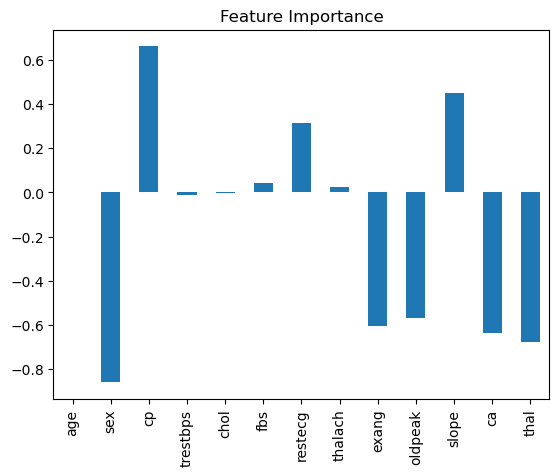

In [130]:
# Visualise Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)
plt.show()

In [132]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


## 6. Experimentation

If you haven't hit your evaluation metric yet... Ask yourself...

* Could you Collect more data?
* Could you try a Better Model? Like CatBoost or XGBoost
* Could you improve the Current Models? (Beyond what we've done so far)
* If your model is good enough, how to Export it and share it with others?